In [1]:
import cvfunc
import cv2
import scale
import symmetry
from tqdm import tqdm
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from multiprocess import Pool
from time import time
from functools import partial
plt.rcParams['figure.figsize'] = [10, 10]

## Load and Basic Transformations

In [2]:
#Paths
original_images_path = '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/original'
mirrored_images_path = "/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/mirrored"
scaled_images_path = "/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink"
output_images_path = "/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/results"
# original_images_path = 'test_run/original'
# mirrored_images_path = "test_run/mirrored"
# scaled_images_path = "test_run/shrink"
# output_images_path = "test_run/results"

In [11]:
#Mirroring images
cvfunc.butterfly(
    folder=original_images_path,
    destination=mirrored_images_path,
    left_keyword="left",
    right_keyword="right",
    bg_color=(1,1,1)
)

Progress: 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


In [12]:
#Scaling down images
for file in tqdm(glob.glob(mirrored_images_path+"/*"),desc="Progress"):
    original = cv2.imread(file)
    resized = scale.resize(original,400) # height, in PX 
    savestring = os.path.join(scaled_images_path,f"{os.path.splitext(os.path.basename(file))[0]}.png")
    cv2.imwrite(savestring,resized)
for file in tqdm(glob.glob(original_images_path+"/*"),desc="Progress"):
    original = cv2.imread(file)
    resized = scale.resize(original,400) # height, in PX 
    savestring = os.path.join(scaled_images_path,f"{os.path.splitext(os.path.basename(file))[0]}.png")
    cv2.imwrite(savestring,resized)

Progress: 100%|██████████| 6/6 [00:00<00:00,  7.47it/s]


In [13]:
search_ratio = 0.05

In [14]:
glob_str = scaled_images_path+"/*"
filenames = glob.glob(glob_str)
filenames[:10]

['/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col61_day10_14apr2021_E_left.png',
 '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col61_day10_14apr2021_E_left_col61_day10_14apr2021_W_right.png',
 '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col61_day10_14apr2021_W_right.png',
 '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col76_day10_14apr2021_E_left.png',
 '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col76_day10_14apr2021_E_left_col76_day10_14apr2021_W_right.png',
 '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col76_day10_14apr2021_W_right.png',
 '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col76_day20_24apr2021_E_left.png',
 '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col76_day20_24apr2021_E_left_col76_day20_24apr2021_W_right.png',
 '/Users/michaelsmith/Box/2D_symmetry_2021/Annotated/test_run/shrink/col76_d

In [15]:
original_img = [cv2.imread(f) for f in glob.glob(glob_str)]

In order to specify colors. Populate the file `palette.json` with the BGR colors of each image. You need to specify it twice because opencv assumes a range of colors instead of a single one.

The `cvfunc.palette_guess` will attempt to assign a palette to a file. This may take a while to run. If you prefer to assign it manually, you can pass the palette directly to the argument `color_dict` in the function `symmetry.process_one`.

In [16]:
palette = {}
with open("palette.json") as jfile:
    palette = json.load(jfile)
#color = [cvfunc.palette_guess(im,palette) for im in tqdm(original_img, desc="Assigning color palettes")]

In [17]:
len(filenames),len(original_img)

(9, 9)

## Optimization - this didn't work, skip to validation

In [23]:
# all_data = []
# def f(x):
#     img,filename = x  
# #for img,filename,c in tqdm(zip(original_img,filenames,color),total=len(filenames)):
#     data,generated_figures = symmetry.process_one(img,search_ratio,color_dict=palette["B"],angle=0)
#     for d in data:
#         d.update({"filename": filename})
#     return data
# def g(x):
#     img,filename = x
# #for img,filename,c in tqdm(zip(original_img,filenames,color),total=len(filenames)):
#     data,generated_figures = symmetry.process_one(img,search_ratio,color_dict=palette["B"],angle=90)
#     for d in data:
#         d.update({"filename": filename})
#     return data

The ideal number of threads is the minimum in which the total CPU power is at 100%. Choosing large pictures might freeze your computer.

In [24]:
all_data = []
t = time()
print("thread", __name__)
if __name__=="__main__":
    with Pool(5) as p:
        print("start")
        all_data += (p.map(partial(symmetry.f,angle=0,search_ratio=search_ratio,color_dict=palette["C"]),zip(original_img,filenames)))
        all_data += (p.map(partial(symmetry.f,angle=90,search_ratio=search_ratio,color_dict=palette["C"]),zip(original_img,filenames)))
    print("Elapsed time", time()-t)
    all_data_ravel = []
    for a in all_data:
        for b in a:
            all_data_ravel.append(b)

thread __main__
process_one 0.05340719223022461
process_one 0.06030893325805664
process_one 0.0673069953918457
process_one 0.09938359260559082process_one 
0.09242796897888184
process_one 0.054712772369384766process_one
 0.04493594169616699
process_oneprocess_one  0.045884847640991210.06781911849975586

start
process_one process_one 0.049275159835815430.055136919021606445process_one

 0.05040597915649414
process_one 0.07858014106750488
process_one 0.08459806442260742
process_oneprocess_one  0.0599920749664306640.05660295486450195

process_one 0.04146718978881836
process_one 0.06646108627319336
Elapsed time 0.3623161315917969


In [25]:
one_sided = pd.DataFrame(all_data_ravel)

In [26]:
one_sided.head()

""


# Validation

Since the background of this picture is red, you cannot use the `ncolor` parameter because it assumes it to be white.

I also noticed that this picture has noisy colors on it, that will generate a measurement error when using the palette.

In [27]:
test_circ = cv2.imread("test6.png")
test_japan = cv2.imread("japan.png")
test = cv2.imread("square.png")

In [28]:
search_ratio = 0.05

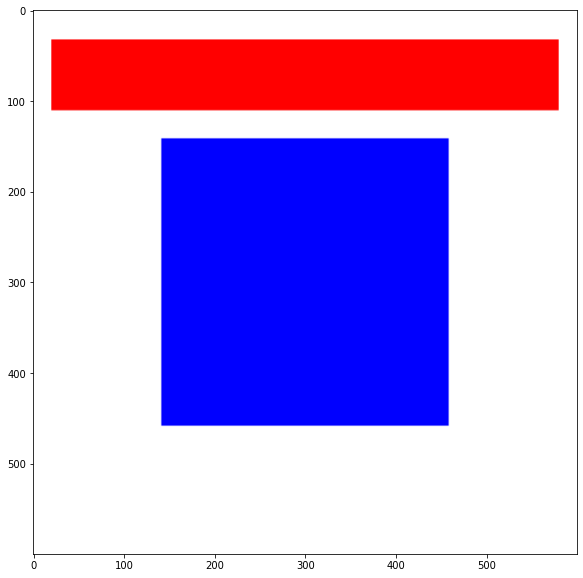

In [29]:
plt.imshow(test)

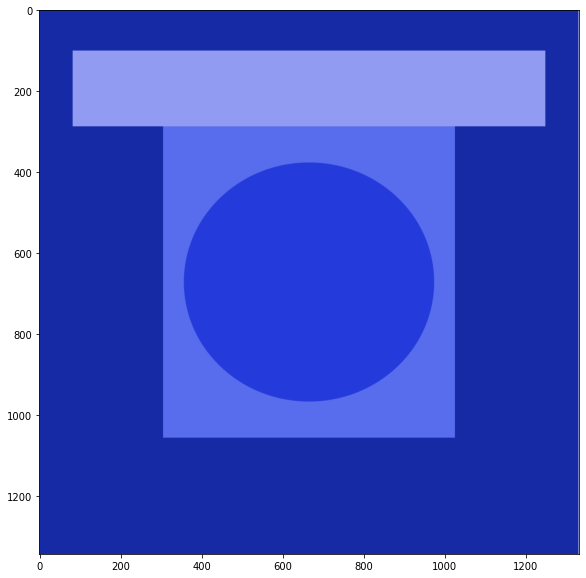

In [30]:
plt.imshow(test_circ)

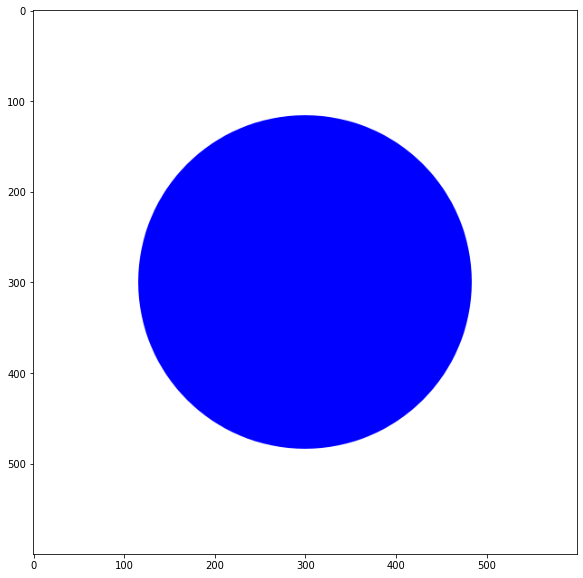

In [31]:
plt.imshow(test_japan)

In [32]:
# test_palette = {
# "r0_circle":[37,60,218,37,60,218],
# "r1_square":[87,109,236,87,109,236],
# "r2_rectangle":[145,155,241,145,155,241],
# "bg":[23,42,166,23,42,166]
# }

# Adding a RANGE to the values... (-2 for the first 3 values; +2 for the last 3 values)
test_palette = {
"r0_circle":[35,58,216,39,62,220],
"r1_square":[85,107,234,89,111,238],
"r2_rectangle":[143,153,239,147,157,243],
"bg":[21,40,164,25,44,168]
}

test_palette_square = {
"square":[0,0,255,0,0,255],
"rectangle":[255,0,0,255,0,0],
"bg":[255,255,255,255,255,255]
}

test_palette_japan = {
"circle":[0,0,255,0,0,255],
"bg":[255,255,255,255,255,255]
}

## Using square figures with auto_crop

In [33]:
d,_ = symmetry.process_one(test,search_ratio,color_dict=test_palette_square,angle=0)

process_one 0.5255060195922852


In [34]:
pd.DataFrame(d)

,angle,x_MSE,score_MSE,x_COR,score_COR,id,R,G,B
0,0,151.0,0.0,151.0,0.0,square,0.0,0.0,1.0
1,0,266.0,0.0,266.0,0.0,rectangle,1.0,0.0,0.0
2,0,286.0,0.0,286.0,0.0,composition,1.0,1.0,1.0


In [35]:
d,_ = symmetry.process_one(test,search_ratio,color_dict=test_palette_square,angle=90)

process_one 0.5531330108642578


In [36]:
pd.DataFrame(d)

,angle,x_MSE,score_MSE,x_COR,score_COR,id,R,G,B
0,90,151.0,0.000000,151.0,0.000000,square,0.0,0.0,1.0
1,90,266.0,0.000000,266.0,0.000000,rectangle,1.0,0.0,0.0
2,90,286.0,0.000014,286.0,0.300836,composition,1.0,1.0,1.0


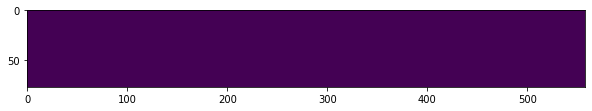

In [37]:
circle = cvfunc.color_threshold(test,sample_low=[test_palette_square["rectangle"][:3]],sample_high=[test_palette_square["rectangle"][3:]])
plt.imshow(cvfunc.auto_crop(circle))

## Using square figures without auto_crop

In [38]:
d,_ = symmetry.process_one(test,search_ratio,color_dict=test_palette_square,angle=0,auto_crop=False)

process_one 0.7076940536499023


In [39]:
pd.DataFrame(d)

,angle,x_MSE,score_MSE,x_COR,score_COR,id,R,G,B
0,0,286.0,0.0,286.0,0.0,square,0.0,0.0,1.0
1,0,286.0,0.0,286.0,0.0,rectangle,1.0,0.0,0.0
2,0,286.0,0.0,286.0,0.0,composition,1.0,1.0,1.0


In [40]:
d,_ = symmetry.process_one(test,search_ratio,color_dict=test_palette_square,angle=90,auto_crop=False)

process_one 0.8436570167541504


In [41]:
pd.DataFrame(d)

,angle,x_MSE,score_MSE,x_COR,score_COR,id,R,G,B
0,90,286.0,0.000000,286.0,0.000000,square,0.0,0.0,1.0
1,90,286.0,0.000047,286.0,1.000000,rectangle,1.0,0.0,0.0
2,90,286.0,0.000014,286.0,0.300836,composition,1.0,1.0,1.0


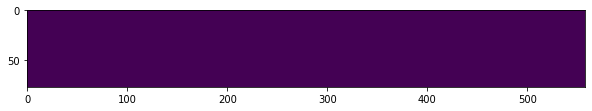

In [42]:
circle = cvfunc.color_threshold(test,sample_low=[test_palette_square["rectangle"][:3]],sample_high=[test_palette_square["rectangle"][3:]])
plt.imshow(cvfunc.auto_crop(circle))

## Using original

In [43]:
test_circ = scale.resize(test_circ,600)
test_circ.shape

(600, 595, 3)

In [44]:
d,_ = symmetry.process_one(test_circ,search_ratio,color_dict=test_palette,angle=0)

process_one 0.8362281322479248


In [45]:
pd.DataFrame(d)

,angle,x_MSE,score_MSE,x_COR,score_COR,id,R,G,B
0,0,132.0,4.932897e-09,132.0,0.000140,r0_circle,0.137255,0.227451,0.847059
1,0,153.0,7.078508e-10,153.0,0.000019,r1_square,0.333333,0.419608,0.917647
2,0,247.0,0.000000e+00,247.0,0.000000,r2_rectangle,0.560784,0.600000,0.937255
3,0,266.0,2.330861e-07,266.0,0.006190,composition,0.082353,0.156863,0.643137


In [46]:
d,_ = symmetry.process_one(test_circ,search_ratio,color_dict=test_palette,angle=90)

process_one 0.9094269275665283


In [47]:
pd.DataFrame(d)

,angle,x_MSE,score_MSE,x_COR,score_COR,id,R,G,B
0,90,132.0,4.932897e-09,132.0,0.000140,r0_circle,0.137255,0.227451,0.847059
1,90,153.0,7.078508e-10,153.0,0.000019,r1_square,0.333333,0.419608,0.917647
2,90,247.0,0.000000e+00,247.0,0.000000,r2_rectangle,0.560784,0.600000,0.937255
3,90,266.0,1.321458e-05,266.0,0.289719,composition,0.082353,0.156863,0.643137


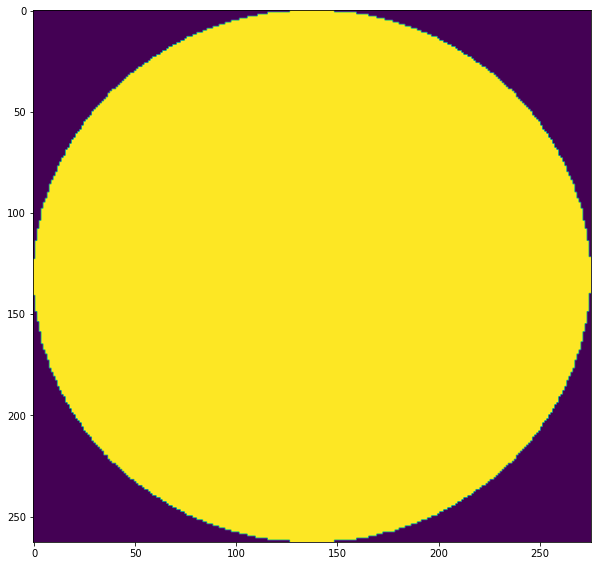

In [48]:
circle = cvfunc.color_threshold(test_circ,sample_low=[test_palette["r0_circle"][:3]],sample_high=[test_palette["r0_circle"][3:]])
circle = cvfunc.auto_crop(circle)
plt.imshow(circle)

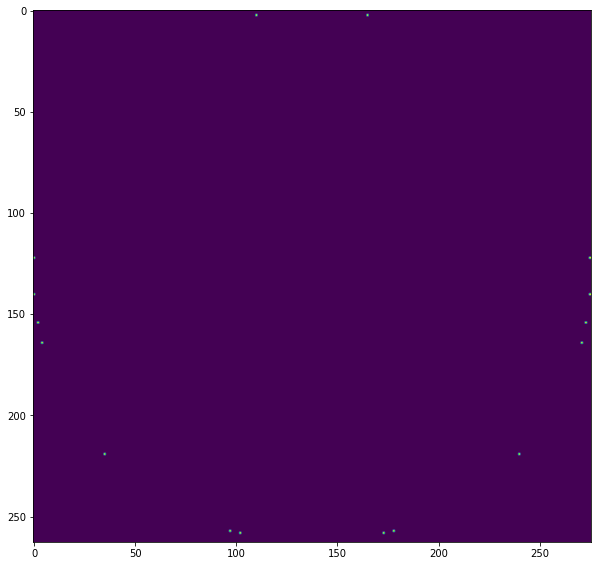

In [49]:
plt.imshow(np.abs(circle-cv2.flip(circle,1)))

In [50]:
a = np.abs((circle-cv2.flip(circle,1))/255).sum()
a

16.0

In [51]:
c = np.abs((circle.T-cv2.flip(circle.T,1))/255).sum()
c

16.0

In [52]:
b = (circle/255).sum()
b

56952.0

In [53]:
a/b

0.00028093833403567916

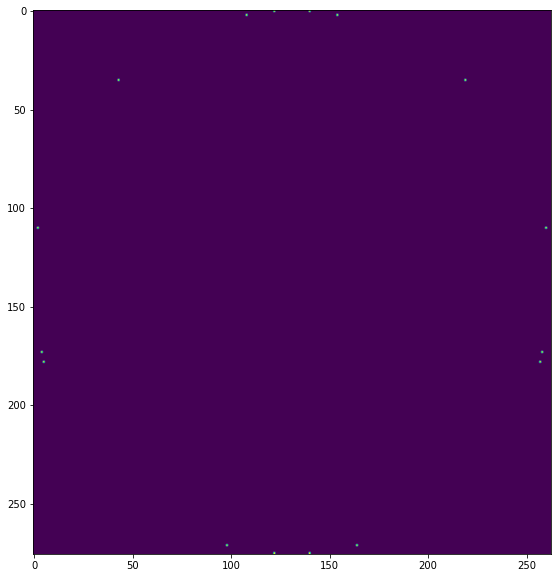

In [54]:
plt.imshow(np.abs(circle.T-cv2.flip(circle.T,1)))

## Using JP

In [55]:
d,_ = symmetry.process_one(test_japan,search_ratio,color_dict=test_palette_japan,angle=0)

process_one 0.1394038200378418


In [56]:
pd.DataFrame(d)

,angle,x_MSE,score_MSE,x_COR,score_COR,id,R,G,B
0,0,174.0,1.077122e-09,174.0,0.000057,circle,0.0,0.0,1.0
1,0,174.0,1.077122e-09,174.0,0.000057,composition,1.0,1.0,1.0


In [57]:
d,_ = symmetry.process_one(test_japan,search_ratio,color_dict=test_palette_japan,angle=90)

process_one 0.14816999435424805


In [58]:
pd.DataFrame(d)

,angle,x_MSE,score_MSE,x_COR,score_COR,id,R,G,B
0,90,174.0,1.077122e-09,174.0,0.000057,circle,0.0,0.0,1.0
1,90,174.0,1.077122e-09,174.0,0.000057,composition,1.0,1.0,1.0


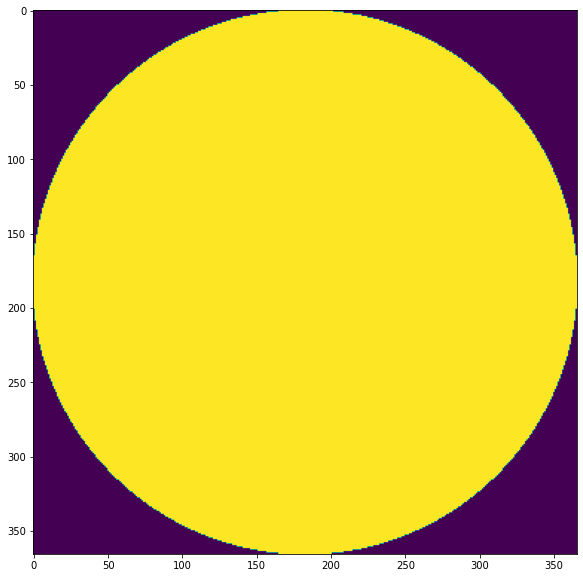

In [59]:
circle = cvfunc.color_threshold(test_japan,sample_low=[test_palette_japan["circle"][:3]],sample_high=[test_palette_japan["circle"][3:]])
circle = cvfunc.auto_crop(circle)
plt.imshow(circle)